<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio Estadistica Descriptiva

⚠️ Siempre que puedas usa graficas para apoyar tu interpretacion


In [48]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np  
import pandas as pd 


# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


# librerias para estadisticas 
# ------------------------------------------------------------------------------

import statistics as st 
from scipy import stats  
from scipy.stats import skew,kurtosis # libreria para asimetria y curtosis 
import warnings
warnings.filterwarnings("ignore")


#### Ejercicio 1: 

1.  Dados los siguientes datos: [15, 21, 25, 32, 35, 45, 50, 50, 55, 60]. Crea una funcion que calcule la media, mediana y moda.


In [20]:
datos = [15, 21, 25, 32, 35, 45, 50, 50, 55, 60]
datos_con_100 = [15, 21, 25, 32, 35, 45, 50, 50, 55, 60, 100]


def media_mediana_moda (datos):
    df = pd.DataFrame(datos)
    lista_vacia = []
    media = df[0].mean()
    mediana = df[0].median()
    moda = df[0].mode()
    lista_vacia.append(media)
    lista_vacia.append(mediana)
    lista_vacia.append(moda)
    return lista_vacia

lista = media_mediana_moda(datos)
print(lista)

<class 'numpy.float64'>
<class 'pandas.core.series.Series'>
[38.8, 40.0, 0    50
Name: 0, dtype: int64]


2.	Interpretación de la media: ¿Qué sucede si un valor extremo, como 100, se agrega al conjunto de datos anterior? ¿Cómo cambia la media? Explica por qué sucede esto.

In [58]:
lista_con_100 = media_mediana_moda(datos_con_100)
print(lista_con_100)

#Observamos que la media aumenta, evidentemente el tema es que quizs no sea lo mas correcto ya que el dato 100 lo podriamos considerar un outlier.


<class 'numpy.float64'>
<class 'pandas.core.series.Series'>
[44.36363636363637, 45.0, 0    50
Name: 0, dtype: int64]



#### Ejercicio 2: 
1. **Cálculo de la varianza y desviación estándar**: Usando los mismos datos de arriba, calcula la **varianza** y la **desviación estándar**.




In [23]:
def varianza_desvia_est (datos):
    df = pd.DataFrame(datos)
    lista_vacia = []
    varianza = df[0].var()
    desv_est = df[0].std()
    
    lista_vacia.append(varianza)
    lista_vacia.append(desv_est)
    return lista_vacia
lista_var_std = varianza_desvia_est(datos)
lista_var_std


[237.2888888888889, 15.404184135775868]

2. **Comparación de dispersión**: Dado otro conjunto de datos: `[18, 19, 20, 22, 24, 25, 27, 30]`, compara la **dispersión** de este grupo con el conjunto de datos anterior (del Ejercicio 1) calculando la **desviación estándar** de ambos. ¿Qué conjunto tiene mayor dispersión?

In [35]:
datos2 = [18, 19, 20, 22, 24, 25, 27, 30]
dispersion_2 = varianza_desvia_est(datos2)
dispersion_1 = varianza_desvia_est(datos)
print(f"Conjunto dato 2{dispersion_2}")
print(f"Conjunto dato 1{dispersion_1}")

# Teniendo en cuenta que estoy reutilzando la función de antes y es el segundo valor de la lista el conjunto de datos 1 tiene una mayor dispersión

Conjunto dato 2[17.267857142857142, 4.155461122770509]
Conjunto dato 1[237.2888888888889, 15.404184135775868]


#### Ejercicio 3:

1. Usa la función correspondiente en Python para calcular la **asimetría** del conjunto de datos: `[10, 20, 20, 20, 25, 30, 35, 40]`. 


In [39]:
def asimetria(datow):
    df = pd.DataFrame(datow)
    asimeetria = df[0].skew()
    return asimeetria

datos3 = [10, 20, 20, 20, 25, 30, 35, 40]

calc_asim = asimetria(datos3)
print(calc_asim)
# Indica que la cola derecha de la distribución es más larga o tiene más peso que la cola izquierda

0.15965369897316026


2. Interpreta el resultado: ¿El conjunto es simétrico, sesgado a la izquierda o a la derecha?

<Axes: ylabel='Density'>

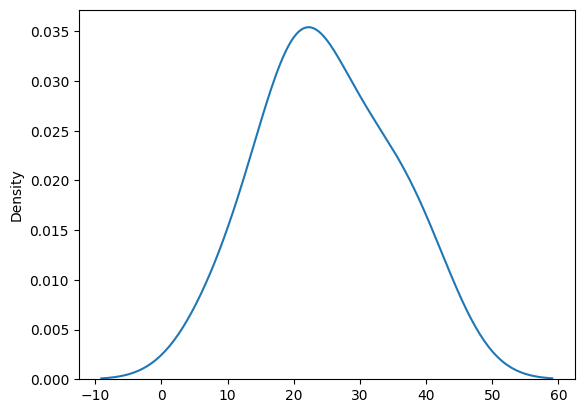

In [49]:
sns.kdeplot(x=datos3) # Comprobamos que la gráfica nos indica lo mismo que el resultado, pero si es verdad que nos ayuda a comprenderlo.

#### Ejercicio 4: 

1. Calcula la **curtosis** para el conjunto de datos: `[5, 5, 5, 20, 25, 30, 30, 50]`. 

In [51]:
datos4 = [5, 5, 5, 20, 25, 30, 30, 50]

def curtosis (datos):
    df = pd.DataFrame(datos)
    curtosis = df[0].kurt()

    return curtosis

calc_curtosis = curtosis(datos4)
calc_curtosis
# Indica que la distribución tiene colas más ligeras y un pico más bajo y ancho en comparación con una distribución normal.

-0.14514157171499864

2. ¿El conjunto tiene una curtosis positiva, negativa o es mesocúrtico? Explica qué implica esto sobre la forma de la distribución.

<Axes: ylabel='Density'>

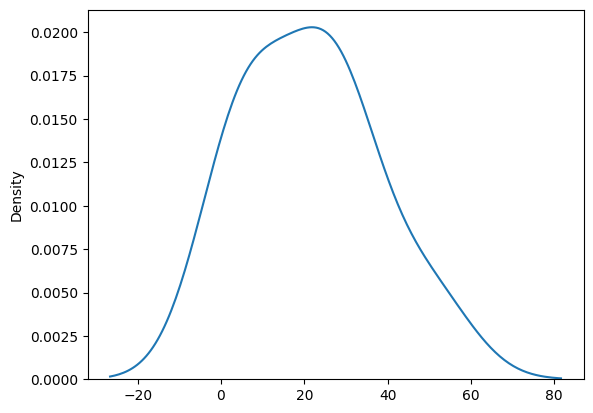

In [53]:
# Indica que la distribución tiene colas más ligeras y un pico más bajo y ancho en comparación con una distribución normal.
sns.kdeplot(x=datos4) # Comprobamos que la gráfica nos indica lo mismo que el resultado, pero si es verdad que nos ayuda a comprenderlo.

#### Ejercicio 5: Caso practico. 


Imagina que una empresa está evaluando el rendimiento de sus empleados para entender la relación entre el tiempo que dedican a su trabajo y el éxito que tienen en términos de ventas. La empresa recopila datos durante un mes, midiendo cuántas **horas trabajó** cada empleado y cuántas **ventas realizaron**. Estos datosa se encuentran en el archivo `rendimiento.csv`

**Horas trabajadas**: 
   - Se midieron las horas trabajadas por un grupo de empleados. En general, la mayoría de los empleados trabajan entre 40 y 60 horas a la semana, con algunos empleados trabajando un poco menos o más.


**Ventas realizadas**:
   - A cada empleado también se le hizo un seguimiento de cuántas ventas realizó. Aunque las ventas están influenciadas por las horas trabajadas, hay cierta **variabilidad**: algunos empleados pueden ser más productivos y vender más en menos tiempo, mientras que otros necesitan trabajar más para alcanzar los mismos resultados.


Resuelve los siguientes puntos:



1. **Cálculo de la media, mediana y moda**:
   - Calcula la **media**, **mediana** y **moda** de las columnas **Horas Trabajadas** y **Ventas Realizadas**.
   - Explica qué información proporciona cada medida en este contexto. Justifica tus conclusiones con representación de graficas. 


In [73]:
df = pd.read_csv("../datos/rendimiento.csv", index_col=0)

def funcion_1 (df):
   print(df["Horas Trabajadas"].mean())
   print(df["Horas Trabajadas"].median())
   print(df["Horas Trabajadas"].mode())
    

   print(df["Ventas Realizadas"].mean())
   print(df["Ventas Realizadas"].median())
   print(df["Ventas Realizadas"].mode())
   
    

funcion_1(df)

48.96153482605907
48.730437082202876
0     23.802549
1     30.124311
2     30.403299
3     30.867198
4     32.369598
        ...    
95    65.230299
96    65.380366
97    65.646437
98    65.792128
99    68.522782
Name: Horas Trabajadas, Length: 100, dtype: float64
49.12
48.0
0    47.0
Name: Ventas Realizadas, dtype: float64


In [69]:
df["Horas Trabajadas"].median()

48.730437082202876


2. **Comparación de medidas de centralización**:
   - ¿Cómo se diferencian la media y la mediana para los datos de **Ventas Realizadas**? ¿Qué indica esta diferencia sobre la distribución de las ventas?


In [ ]:
# tu codigo aqui

3. **Cálculo de la varianza y desviación estándar**:
   - Calcula la **varianza** y la **desviación estándar** para las columnas **Horas Trabajadas** y **Ventas Realizadas**.
   - ¿Qué conjunto de datos es más disperso? Explica el significado de la dispersión en este caso. Justifica tus conclusiones con representación de graficas. 


In [ ]:
# tu codigo aqui

4. **Rango y rango intercuartílico**:
   - Calcula el **rango** y el **rango intercuartílico** para ambas columnas. 
   - ¿Qué te dice esto sobre la variabilidad de los datos? Justifica tus conclusiones con representación de graficas. 

In [ ]:
# tu codigo aqui

5. **Cálculo de la asimetría**:
   - Usa la función adecuada en Python para calcular la **asimetría** de los datos de **Horas Trabajadas** y **Ventas Realizadas**. 
   - Interpreta si el conjunto de datos es **simétrico**, **sesgado a la izquierda** o **sesgado a la derecha**.

In [ ]:
# tu codigo aqui

6. **Cálculo de la curtosis**:
   - Calcula la **curtosis** para ambos conjuntos de datos. ¿Los conjuntos tienen una curtosis positiva, negativa o son mesocúrticos? 
   - Explica qué implica esto sobre la forma de la distribución.

7. **Gráfico de dispersión**:
   - Crea un **gráfico de dispersión** entre **Horas Trabajadas** y **Ventas Realizadas**. 
   - ¿Hay alguna correlación entre ambas variables? Explica cómo interpretar la relación entre las dos variables.

8. **Análisis exploratorio completo**:
   - Realiza un análisis exploratorio detallado de los datos, incluyendo todas las medidas calculadas en los ejercicios anteriores. Presenta los resultados en forma de un informe claro y visual con gráficos y tablas que resuman las características clave de los datos.


